In [1]:
import pandas as pd
import numpy as np
pd.set_option('display.max_columns', 150)
pd.set_option('display.max_rows', 100)

In [2]:
#main merged dataframe
df_main_concat = pd.read_pickle('df_prod_trans_user_rew_supp_v3.pkl')

In [3]:
df_main_concat.head(1)

,is_elite_user,supplier_id,order_parent_id,product_content_id,product_variant_id,original_price,discounted_price,ship_cost,coupon_discount,promotion_award_value,is_wallet_trx,is_saved_card_trx,is_returned,count,same_prod_dif_size_count,brand_id,gender_id,category_id,color_id,attribute_value,0_x,1_x,2_x,3_x,4_x,5_x,6_x,7_x,8_x,9_x,10_x,11_x,12_x,13_x,14_x,15_x,16_x,17_x,18_x,19_x,0_x,1_x,2_x,3_x,4_x,5_x,6_x,7_x,8_x,9_x,10_x,11_x,12_x,13_x,14_x,15_x,16_x,17_x,18_x,19_x,rate,review_like_count,0_y,1_y,2_y,3_y,4_y,5_y,6_y,7_y,8_y,9_y,10_y,11_y,12_y,13_y,14_y,15_y,16_y,17_y,18_y,19_y,20,21,22,23,24,25,26,27,28,29,returnRate_ret,returnRate_def,total_claim,unresolved_claim,unresolved_accepted_claim,unresolvedclaim_percentage
0,0,4662,595758968,95503167,159147197,79.9,51.94,8.88,0.0,35.0,0,1,0.0,1,1,148,0,50,2,1180,-0.02397,-0.021583,-0.024003,-0.04902,-0.003887,-0.038962,-0.02406,-0.036875,0.049678,-0.006779,-0.038771,0.027583,-0.040332,-0.009561,0.013677,-0.035396,-0.043668,-0.033208,0.037342,0.045288,-1.284929,-1.254115,-1.782976,-0.12738,1.924536,0.055261,1.629931,-2.285416,-1.703261,-0.308678,1.169102,0.600538,-0.844449,-0.319412,-1.381115,-1.230004,-0.166193,0.662455,1.057862,-0.365327,3.25,0.0,-0.033843,-1.833734,-0.818248,-1.779563,-2.179461,-1.678068,-2.464959,0.605734,1.051787,0.692738,0.821323,-1.415752,1.587257,-0.264496,-1.374641,-0.596889,-0.273802,-2.635564,0.677161,-0.516057,1.706807,-0.245808,-0.395436,2.461663,-1.903484,0.331082,0.646957,-0.395696,-0.52306,-0.745091,0.098178,0.003045,16357,76,25,0.328947


In [4]:
pd.DataFrame(df_main_concat.isna().sum())

,0
is_elite_user,0
supplier_id,0
order_parent_id,0
product_content_id,0
product_variant_id,0
original_price,0
discounted_price,0
ship_cost,36108
coupon_discount,0
promotion_award_value,5651007


In [5]:
#nan values are filled with some aggregation options.
df_main_concat['ship_cost']= df_main_concat['ship_cost'].fillna(df_main_concat.ship_cost.mean())
df_main_concat['promotion_award_value']= df_main_concat['promotion_award_value'].fillna(df_main_concat.promotion_award_value.mean())
df_main_concat['rate']= df_main_concat.rate.fillna(df_main_concat['rate'].mode()[0])
df_main_concat['review_like_count']= df_main_concat['review_like_count'].fillna(df_main_concat.review_like_count.mode()[0])
df_main_concat.iloc[:,-36:] = df_main_concat.iloc[:,-36:].fillna(0)

In [6]:
df_main_concat.isna().sum()

is_elite_user                      0
supplier_id                        0
order_parent_id                    0
product_content_id                 0
product_variant_id                 0
original_price                     0
discounted_price                   0
ship_cost                          0
coupon_discount                    0
promotion_award_value              0
is_wallet_trx                      0
is_saved_card_trx                  0
is_returned                   420819
count                              0
same_prod_dif_size_count           0
brand_id                           0
gender_id                          0
category_id                        0
color_id                           0
attribute_value                    0
0_x                                0
1_x                                0
2_x                                0
3_x                                0
4_x                                0
5_x                                0
6_x                                0
7

In [7]:
#edited test submission dataframe
df_test = pd.read_csv('datas/test_data.csv')
df_test['user_id'] = df_test['id'].str.split('|',expand=True)[0]
df_test['product_content_id'] = df_test['id'].str.split('|',expand=True)[1]
df_test['order_parent_id'] = df_test['id'].str.split('|',expand=True)[2]
df_test.drop(columns=['id'],inplace=True)
df_test.head()

,expected,user_id,product_content_id,order_parent_id
0,NaN,18115,87073974,726348863
1,NaN,27588,118753298,723169934
2,NaN,29165,35699988,724122443
3,NaN,29969,5893187,722342150
4,NaN,35107,93897418,723421057


In [8]:
#train and submission datas are seperated.
df_train = df_main_concat[df_main_concat.order_parent_id.isin(df_test.order_parent_id.astype('int'))==False]
df_valid = df_main_concat[df_main_concat.order_parent_id.isin(df_test.order_parent_id.astype('int'))==True]
len(df_train)

11162323

In [9]:
#to avoid memory problems
del df_main_concat

In [10]:
#y_label is dropped from train dataframe
df_train.dropna(subset=['is_returned'],inplace=True)

In [11]:
#some embedding vector column names are dublicated.Some names need to change.
for i in range(40):
    df_train.columns.values[20+i] = str(i) + 'a'

In [12]:
#Dataset preparation
from sklearn.model_selection import train_test_split
X = df_train.drop(columns=['is_returned','supplier_id','order_parent_id','product_content_id','product_variant_id'])
y = df_train.loc[:,['is_returned']]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [13]:
#to avoid memory problems
del df_train

In [14]:
X_train.head(1)

,is_elite_user,original_price,discounted_price,ship_cost,coupon_discount,promotion_award_value,is_wallet_trx,is_saved_card_trx,count,same_prod_dif_size_count,brand_id,gender_id,category_id,color_id,attribute_value,0a,1a,2a,3a,4a,5a,6a,7a,8a,9a,10a,11a,12a,13a,14a,15a,16a,17a,18a,19a,20a,21a,22a,23a,24a,25a,26a,27a,28a,29a,30a,31a,32a,33a,34a,35a,36a,37a,38a,39a,rate,review_like_count,0_y,1_y,2_y,3_y,4_y,5_y,6_y,7_y,8_y,9_y,10_y,11_y,12_y,13_y,14_y,15_y,16_y,17_y,18_y,19_y,20,21,22,23,24,25,26,27,28,29,returnRate_ret,returnRate_def,total_claim,unresolved_claim,unresolved_accepted_claim,unresolvedclaim_percentage
9855824,0,39.8,39.8,5.335,0.0,27.769539,0,1,1,1,3741,1,5,13,1180,-0.614902,-0.862805,-1.404566,0.212435,1.111805,0.309511,0.787151,-0.695222,-0.28377,0.320763,0.187902,-0.099159,0.185424,-0.023398,0.081918,1.171175,0.967994,-0.183432,1.796627,-1.218187,-2.032097,1.318491,0.409146,1.107047,-1.683235,0.118017,-1.884886,-1.074673,-2.023018,-0.932454,-0.489761,1.13321,0.456026,-2.549549,0.885047,-3.678533,-1.735217,1.941372,2.415823,-1.64235,3.921053,0.203947,-0.070917,-1.764528,-0.812882,-1.798862,-2.12981,-1.652089,-2.381273,0.572743,1.005997,0.683851,0.80564,-1.368921,1.574881,-0.247561,-1.364398,-0.435387,-0.274855,-2.54376,0.591362,-0.509811,1.632584,-0.182146,-0.38714,2.370843,-1.856897,0.279999,0.5957,-0.509237,-0.470359,-0.714302,0.057681,0.0,766,72,45,0.625


In [15]:
from lightgbm import LGBMClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score

model_lgbm = LGBMClassifier()
model_lgbm.fit(X_train,y_train)
pred = model_lgbm.predict(X_test)
acc = accuracy_score(y_test,pred)
f1 = f1_score(y_test,pred,average='weighted')
print(f'acc score: %{acc*100}')
print(f'f1 score: {f1}')

C:\Users\doguc\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\preprocessing\_label.py:98: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\doguc\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\preprocessing\_label.py:133: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


acc score: %92.13445871857012
f1 score: 0.9107337654885443


As you see in above, scores are > 0.9 <br>
Now lets see which features are most important for lgbm model

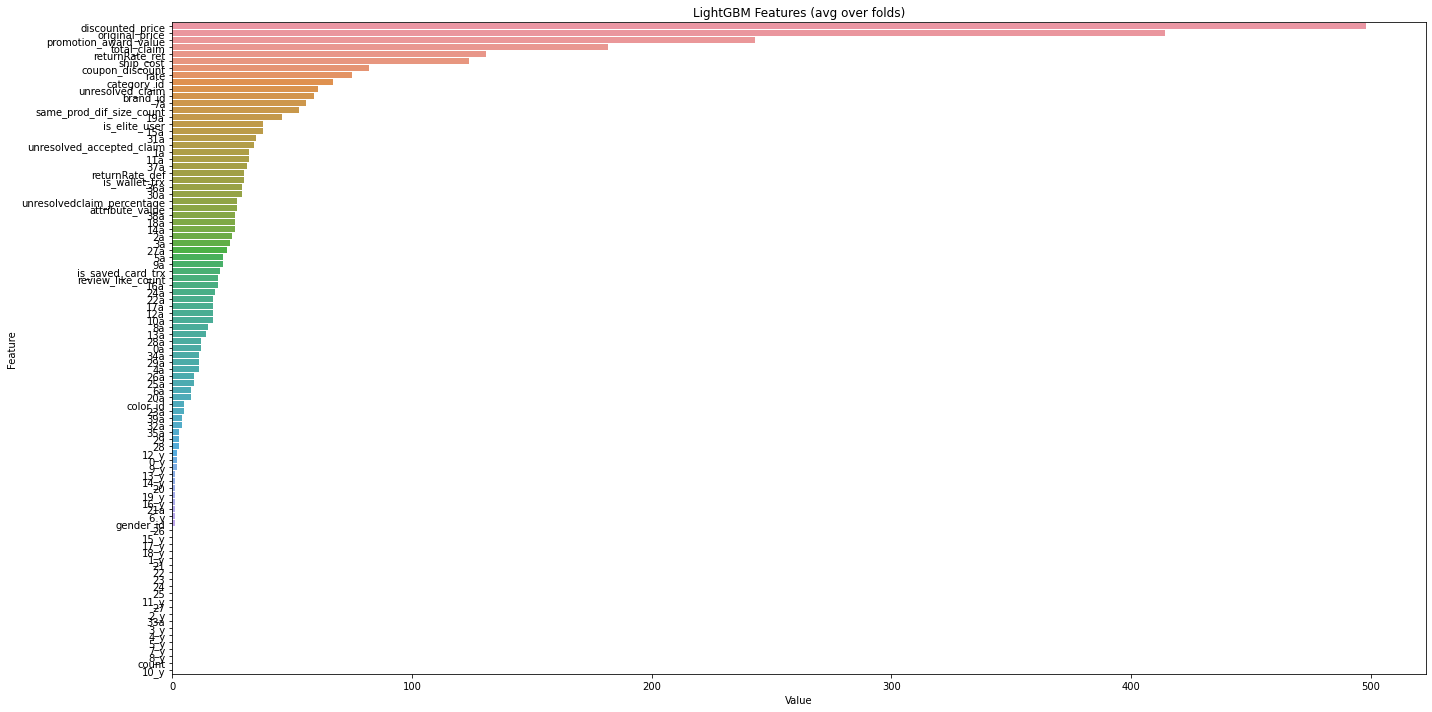

In [16]:
import seaborn as sb
import matplotlib.pyplot as plt
feature_imp = pd.DataFrame(sorted(zip(model_lgbm.feature_importances_,model_lgbm.feature_name_)), columns=['Value','Feature'])

plt.figure(figsize=(20, 10))
sb.barplot(x="Value", y="Feature", data=feature_imp.sort_values(by="Value", ascending=False))
plt.title('LightGBM Features (avg over folds)')
plt.tight_layout()
plt.show()

So, as feature importance table, effect of some columns are pretty low. So i take top20 features for
training.

In [17]:
from lightgbm import LGBMClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score

model_lgbm1= LGBMClassifier()
model_lgbm1.fit(X_train.loc[:,model_lgbm.feature_name_[:20]],y_train)
pred = model_lgbm1.predict(X_test.loc[:,model_lgbm.feature_name_[:20]])
acc = accuracy_score(y_test,pred)
f1 = f1_score(y_test,pred,average='weighted')
print(f'acc score: %{acc*100}')
print(f'f1 score: {f1}')

C:\Users\doguc\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\preprocessing\_label.py:98: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\doguc\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\preprocessing\_label.py:133: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


acc score: %91.70350561609327
f1 score: 0.9051709727220543


Result scores are a little bit lower than previous one. So other features also take important information about is_returned.

In [18]:
valid_preds = model_lgbm1.predict(df_valid.loc[:,model_lgbm.feature_name_[:20]])
df_valid.is_returned = valid_preds
df_valid.is_returned.value_counts()

0.0    25093
1.0     3046
Name: is_returned, dtype: int64

In [19]:
#Main aim is predict if any product will be returned in same order. So each order_parent_id is converted as 1 column.
df_valid_grouped = df_valid.groupby(['order_parent_id'])['is_returned'].max()

In [20]:
df_test.order_parent_id = df_test.order_parent_id.astype('int')

In [21]:
#predicted values are merged on order_parent_ids.
df_test = pd.merge(df_test,df_valid_grouped,on=['order_parent_id'],how='left')

In [22]:
df_test['expected'] = df_test['is_returned']
df_test.drop(columns=['is_returned'],inplace=True)
df_test

,expected,user_id,product_content_id,order_parent_id
0,1.0,18115,87073974,726348863
1,1.0,27588,118753298,723169934
2,0.0,29165,35699988,724122443
3,1.0,29969,5893187,722342150
4,0.0,35107,93897418,723421057
...,...,...,...,...
7466,1.0,71083899,100019570,728638514
7467,0.0,71106534,35624085,725372928
7468,0.0,71115350,94438742,725291348
7469,0.0,71115350,100017676,725291348


In [23]:
#test data is saved as desired format.
df_orig_test = pd.read_csv('datas/test_data.csv')
df_orig_test.expected = df_test.expected

df_orig_test.loc[df_orig_test.expected==0,'expected'] = False
df_orig_test.loc[df_orig_test.expected==1,'expected'] = True

In [24]:
df_orig_test.to_csv('late_submit2.csv',index=False)